# Práctica Ipython

## Análisis experimental

### Insertion Sort
Implementación Cormen

In [1]:
def insertionSort(n):
    j=1
    while j<len(n):
        llave=n[j]
        i=j-1
        while i>=0 and n[i]>llave:
            n[i+1]=n[i]
            i=i-1
        n[i+1]=llave
        j=j+1

Creación e inicialización de los arreglos.

In [2]:
import itertools
import math
import time

menor=4
mayor=6

arreglos=[]
for i in range(menor,mayor+1):
    lista=list(range(i))
    arreglos.append(lista)

print arreglos

[[0, 1, 2, 3], [0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5]]


### Cálculo de datos

In [3]:
datos=[]
for arreglo in arreglos:
    tiempos=[0]*(math.factorial(len(arreglo)))
    #print tiempos
    permutaciones=list(itertools.permutations(arreglo))
    for n in xrange(100):
        ind=0
        for i in permutaciones:
            lista=list(i)
            tInicial=time.clock()
            insertionSort(lista)
            tFinal=time.clock()
            tTotal=tFinal-tInicial
            tiempos[ind]+=tTotal
            ind+=1
        #print n, tiempos
        
    for n in xrange(len(tiempos)):
        tiempos[n]/=100
        
    datos.append(tiempos)

mejores=[]
peores=[]
promedios=[]
    
for i in xrange(len(arreglos)):
    print "Arreglo de tamaño:",len(arreglos[i])
    print "Mejor:",datos[i][0]
    mejores.append(datos[i][0])
    print "Peor:",datos[i][len(datos[i])-1]
    peores.append(datos[i][len(datos[i])-1])
    prom=sum(datos[i])/len(datos[i])
    print "Promedio:",prom
    promedios.append(prom)
    #print datos[i][len(datos[i])-1]-datos[i][0]    
    print ""
    

Arreglo de tamaño: 4
Mejor: 3.16449922227e-06
Peor: 4.584247522e-06
Promedio: 3.88981574822e-06

Arreglo de tamaño: 5
Mejor: 3.4780982443e-06
Peor: 6.17504983374e-06
Promedio: 4.8847324031e-06

Arreglo de tamaño: 6
Mejor: 4.24213949797e-06
Peor: 9.08296803799e-06
Promedio: 6.69668537871e-06



### Interpolación

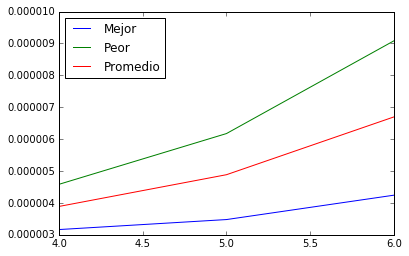

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

x = np.linspace(menor,mayor,mayor-menor+1,endpoint=True)
plt.plot(x,mejores,x,peores,x,promedios)
plt.legend(['Mejor','Peor','Promedio'],loc='best')

In [5]:
x2 = np.arange(menor,mayor+1,1)

pm = np.polyfit(x2, mejores, 2)
pr = np.polyfit(x2, mejores, 2)
pp = np.polyfit(x2, mejores, 2)

print "Constantes para los polinomios:"
print "Pol mejr caso: ("+str(pm[0])+")x²+("+str(pm[1])+")x+("+str(pm[2])+")"
print "Pol prom caso: ("+str(pr[0])+")x²+("+str(pr[1])+")x+("+str(pr[2])+")"
print "Pol peor caso: ("+str(pp[0])+")x²+("+str(pp[1])+")x+("+str(pp[2])+")"

Constantes para los polinomios:
Pol mejr caso: (2.2522111582e-07)x²+(-1.71339102035e-06)x+(6.41452545057e-06)
Pol prom caso: (2.2522111582e-07)x²+(-1.71339102035e-06)x+(6.41452545057e-06)
Pol peor caso: (2.2522111582e-07)x²+(-1.71339102035e-06)x+(6.41452545057e-06)


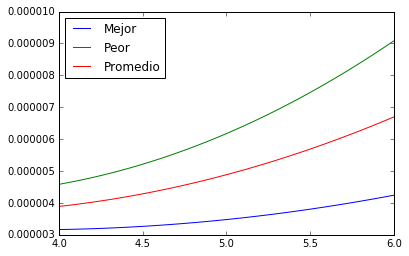

In [6]:
f1 = interp1d(x,mejores,kind='quadratic')
f2 = interp1d(x,peores,kind='quadratic')
f3 = interp1d(x,promedios,kind='quadratic')

x = np.linspace(menor,mayor,40,endpoint=True)

plt.plot(x,f1(x),x,f2(x),x,f3(x))
plt.legend(['Mejor','Peor','Promedio'],loc='best')